In [ ]:
!pip install kytea
# !pip install subword-nmt

     |████████████████████████████████| 5.2MB 6.9MB/s 


In [ ]:
!wget http://www.phontron.com/kytea/download/model/jp-0.4.7-5.mod.gz

--2021-01-26 03:19:01--  http://www.phontron.com/kytea/download/model/jp-0.4.7-5.mod.gz
Resolving www.phontron.com (www.phontron.com)... 208.113.196.149
Connecting to www.phontron.com (www.phontron.com)|208.113.196.149|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39489799 (38M) [application/gzip]
Saving to: ‘jp-0.4.7-5.mod.gz’

jp-0.4.7-5.mod.gz   100%[===================>]  37.66M  26.7MB/s    in 1.4s    

2021-01-26 03:19:03 (26.7 MB/s) - ‘jp-0.4.7-5.mod.gz’ saved [39489799/39489799]



In [ ]:
!gzip -d jp-0.4.7-5.mod.gz

In [ ]:
import unittest

import Mykytea

opt = "-model jp-0.4.7-5.mod"
mk = Mykytea.Mykytea(opt)

s = "取りかかる"

for word in mk.getWS(s):
    print(word)

取りかか
る


In [ ]:
import unittest
import codecs

import os,sys,inspect

from subword_nmt.learn_bpe import learn_bpe
from subword_nmt.apply_bpe import BPE

In [ ]:
f = open("/content/glosbe_train.filtered.ja", encoding="utf-8")
out = open("/content/glosbe_train.tokenized.filtered.ja", "w",encoding="utf-8")
for line in f.readlines():
    out.write(' '.join(mk.getWS(line)))

In [ ]:
!pip install vncorenlp

     |████████████████████████████████| 2.7MB 5.7MB/s 
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-cp36-none-any.whl size=2645936 sha256=387f18f3ba3d1696da6a8ee86d123c1d99b49a5b719baee30dc9a3b816ca7467
  Stored in directory: /root/.cache/pip/wheels/09/54/8b/043667de6091d06a381d7745f44174504a9a4a56ecc9380c54
Successfully built vncorenlp


In [ ]:
!git clone https://github.com/vncorenlp/VnCoreNLP.git

Cloning into 'VnCoreNLP'...
remote: Enumerating objects: 212, done.
remote: Total 212 (delta 0), reused 0 (delta 0), pack-reused 212
Receiving objects: 100% (212/212), 214.21 MiB | 40.14 MiB/s, done.
Resolving deltas: 100% (76/76), done.


In [ ]:
from vncorenlp import VnCoreNLP
model_path = '/content/VnCoreNLP/VnCoreNLP-1.1.1.jar'
vn = VnCoreNLP(model_path)

In [ ]:
f = open("/content/dev2010.ja-vi.vi", encoding="utf-8")
out = open("/content/dev_tokenized.ja-vi.vi", "w",encoding="utf-8")
for line in f.readlines():
    out.write(' '.join(vn.tokenize(line)[0]))
    out.write("\n")

In [ ]:
!cp ./*tokenized.* /content/drive/MyDrive/JaVi_Translation/data

In [ ]:
!cp /content/drive/MyDrive/ja.zip ./

In [ ]:
!unzip ja.zip

Archive:  ja.zip
  inflating: ja.bin                  
  inflating: ja.tsv                  
  inflating: ja.bin.syn1neg.npy      
  inflating: ja.bin.syn0.npy         


In [ ]:
import pandas as pd

f = open("ja.tsv", encoding="utf-8")
lines = f.readlines()


In [ ]:
f = open("ja.tsv", encoding="utf-8")

vecs = f.read().split("]")
vecs = ["".join(x.split('\n')) for x in vecs]

vecs[:10]

['0\tの\t[-0.59942788  0.89275813 -1.35001791  1.1442318   0.41814762 -0.62924099  0.56318384 -0.26814499  0.74478924  0.06280211 -0.68440104  0.50390428  0.86023813  0.82229441 -0.22300546  0.77002162  0.36964938  0.29811472  0.70310605 -0.2008642   0.07087748 -0.46978039  0.70631605  0.61496943 -0.76686507  1.00468051  0.66606176 -0.21515279  0.74559611 -1.74726057 -1.89990127  0.14235918 -2.0110209   0.92132616  1.28762114  0.34154063 -0.67269433  0.94077665 -0.29111108  0.18492144  0.25877821  1.16799164 -0.35247782  0.62073803  0.57721388 -0.10543845  0.7565549  -0.3290866  0.59775341  0.3998104  -0.22729397  0.30069235  1.390275   -0.62600207  0.50826633  0.42473629 -0.27633014  0.19176175  0.32789895  0.75210798 -0.41039592  0.21454856 -0.13024969  1.02355611 -0.05073407 -0.61705393  0.40737098  0.18339767 -0.36855036  0.20530076 -0.04361965 -0.52637923 -0.57796723  0.59599298 -0.37229487  0.59433246  0.09605324  0.49439266  0.78946221  0.28779811 -0.28170079 -0.8038795  -0.16734

In [ ]:
import torch

a = vecs[0]

# x = a.split("\t")
# vec = torch.Tensor([float(i) for i in x[2].replace("[","").split()])
# vec.shape

f = open("ja_w2v.txt", "w", encoding = "utf-8")
for vec in vecs:
    parts = vec.split("\t")
    try:
        line = parts[1] + " " + " ".join(parts[2].replace("[","").split()) + "\n"
    except Exception:
        print(vec)
    f.write(line)

In [ ]:
!cp /content/wiki.vi.model.bin /content/drive/MyDrive/JaVi_Translation/w2v_pretrained

In [ ]:
!wget https://thiaisotajppub.s3-ap-northeast-1.amazonaws.com/publicfiles/wiki.vi.model.bin.gz

In [ ]:
!gunzip wiki.vi.model.bin.gz

gzip: wiki.vi.model.bin.gz: No such file or directory


In [ ]:
import gensim

wv_model = gensim.models.KeyedVectors.load_word2vec_format('/content/wiki.vi.model.bin', binary=True)
"tôi" in wv_model.wv.vocab

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


True

In [ ]:
import numpy as np



In [ ]:
f = open("vi_w2v.txt", "w", encoding = "utf-8")
for word in wv_model.wv.vocab:
    line = word + "\t" + " ".join([str(x) for x in wv_model.wv["tôi"].tolist()])
    f.write(line) 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
f = open('/content/drive/MyDrive/JaVi_Translation/w2v_pretrained/ja_w2v.txt', encoding='utf-8')

f.readlines()[:10]

['の\t-0.59942788 0.89275813 -1.35001791 1.1442318 0.41814762 -0.62924099 0.56318384 -0.26814499 0.74478924 0.06280211 -0.68440104 0.50390428 0.86023813 0.82229441 -0.22300546 0.77002162 0.36964938 0.29811472 0.70310605 -0.2008642 0.07087748 -0.46978039 0.70631605 0.61496943 -0.76686507 1.00468051 0.66606176 -0.21515279 0.74559611 -1.74726057 -1.89990127 0.14235918 -2.0110209 0.92132616 1.28762114 0.34154063 -0.67269433 0.94077665 -0.29111108 0.18492144 0.25877821 1.16799164 -0.35247782 0.62073803 0.57721388 -0.10543845 0.7565549 -0.3290866 0.59775341 0.3998104 -0.22729397 0.30069235 1.390275 -0.62600207 0.50826633 0.42473629 -0.27633014 0.19176175 0.32789895 0.75210798 -0.41039592 0.21454856 -0.13024969 1.02355611 -0.05073407 -0.61705393 0.40737098 0.18339767 -0.36855036 0.20530076 -0.04361965 -0.52637923 -0.57796723 0.59599298 -0.37229487 0.59433246 0.09605324 0.49439266 0.78946221 0.28779811 -0.28170079 -0.8038795 -0.1673405 -0.21536738 -0.20999816 0.48378295 0.1234084 -0.1270168 -0.

In [ ]:
!pip install bpemb

     |████████████████████████████████| 1.2MB 10.5MB/s 


In [ ]:
from bpemb import BPEmb

bpemb_ja = BPEmb(lang="ja", dim=300, vs=25000)

100%|██████████| 647083/647083 [00:00<00:00, 11141015.62B/s]

downloading https://nlp.h-its.org/bpemb/ja/ja.wiki.bpe.vs25000.model
downloading https://nlp.h-its.org/bpemb/ja/ja.wiki.bpe.vs25000.d300.w2v.bin.tar.gz



100%|██████████| 27996825/27996825 [00:00<00:00, 53498265.62B/s]


In [ ]:
bpemb_ja.encode('山脈')

['▁山', '脈']

In [ ]:
import re

def preprocess(text):
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]','',text)
    return text

f = open("/content/drive/MyDrive/JaVi_Translation/data/train_tokenized.ja-vi.vi", encoding="utf-8")
out = open("/content/train_preprocess_tokenized.ja-vi.vi", "w",encoding="utf-8")
for line in f.readlines():
    out.write(preprocess(line))

In [ ]:
bpemb_vi = BPEmb(lang="vi", dim=300, vs=25000)

100%|██████████| 627112/627112 [00:00<00:00, 10372125.30B/s]

downloading https://nlp.h-its.org/bpemb/vi/vi.wiki.bpe.vs25000.model
downloading https://nlp.h-its.org/bpemb/vi/vi.wiki.bpe.vs25000.d300.w2v.bin.tar.gz



100%|██████████| 27993874/27993874 [00:00<00:00, 50633864.47B/s]


In [ ]:
bpemb_vi.encode("hai")

['▁hai']

In [ ]:
!cp ./*preprocess* /content/drive/MyDrive/JaVi_Translation/data

In [ ]:
!ls

dev2010.ja-vi.ja		    test_preprocess_tokenized.ja-vi.vi
dev2010.ja-vi.vi		    train.ja-vi.ja
dev_preprocess_tokenized.ja-vi.ja   train.ja-vi.vi
dev_tokenized.ja-vi.ja		    train_preprocess_tokenized.ja-vi.ja
drive				    train_preprocess_tokenized.ja-vi.vi
sample_data			    tst2010.ja-vi.ja
test_preprocess_tokenized.ja-vi.ja  tst2010.ja-vi.vi


In [ ]:
import glob
import pandas as pd
import collections
import matplotlib.pyplot as plt

def CountFrequency(arr): 
    return collections.Counter(arr)

path = "/content/drive/MyDrive/JaVi_Translation/data"
def key_static():
  path_folder = path+"/"
  files = [f for f in glob.glob(path_folder + "train_tokenized.ja-vi.vi", recursive=True)]
  number_lines = []
  length_line = []
  for file in files:
    f = open(file,"r")
    n_line = 0
    for line in f:
      n_line += 1
      length_line.append(len(line.split()))
    number_lines.append(n_line)
  
  length_line.sort()
  freq = CountFrequency(length_line)
  len_sentences = []
  value_len_sentences = []
  for (key, value) in freq.items(): 
    len_sentences.append(key)
    value_len_sentences.append(value)

  plt.plot(len_sentences, value_len_sentences)
  # naming the x-axis 
  plt.xlabel('Độ dài')
  plt.ylabel('Số lượng câu')
  # plot title 
  plt.title('Độ dài của câu') 
  plt.show() 

  sum_length_sentences = 0
  max_length_sentences = 0
  min_length_sentences = 10000
  for item in length_line:
    sum_length_sentences += item
  for item in len_sentences:
    if(item > max_length_sentences):
      max_length_sentences = item
    if(item < min_length_sentences) and item !=0:
      min_length_sentences = item

  print("Độ dài trung bình: ", sum_length_sentences/len(length_line))
  print("MAX: ", max_length_sentences)
  print("MIN: ", min_length_sentences)

  number_lines.sort()
  freq = CountFrequency(number_lines)
  n_lines = []
  value_n_lines = []
  for (key, value) in freq.items(): 
    n_lines.append(key)
    value_n_lines.append(value)

  plt.plot(n_lines, value_n_lines)
  # naming the x-axis 
  plt.xlabel('Số câu') 
  plt.ylabel('Số lượng văn bản')
  # plot title 
  plt.title('Thống kê số câu trong một văn bản') 
  plt.show() 

  sum_number_sentences = 0
  max_number_sentences = 0
  min_number_sentences = 10000

  for item in number_lines:
    sum_number_sentences += item
  for item in n_lines:
    if(item > max_number_sentences):
      max_number_sentences = item
    if(item < min_number_sentences):
      min_number_sentences = item

  print("Trung bình số câu trong văn bản: ", sum_number_sentences/len(number_lines))
  print("MAX: ", max_number_sentences)
  print("MIN: ", min_number_sentences)
 

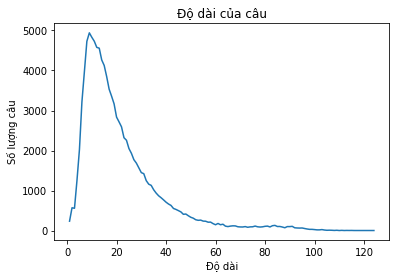

Độ dài trung bình:  21.42368704614664
MAX:  124
MIN:  1


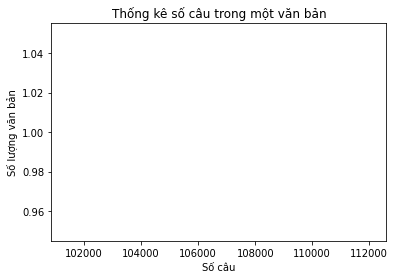

Trung bình số câu trong văn bản:  106725.0
MAX:  106725
MIN:  10000


In [ ]:
key_static()